In [2]:
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt


In [3]:
# Define a function to load the images from the folders and convert them to feature vectors
def load_images(folder_path):
    images = []
    labels = []
    label_dict = {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}

    for label in label_dict.keys():
        folder = os.path.join(folder_path, label)
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = imread(img_path)
            img = resize(img, (150, 150))  # Resize the images to 150x150
            images.append(img.flatten())  # Flatten the image into a 1D array
            labels.append(label_dict[label])
        print(f'Loaded {len(os.listdir(folder))} images from {label} folder')

    return np.array(images), np.array(labels)

In [4]:
# Load and preprocess the dataset
training_data_dir = 'data/seg_train/seg_train'
X_train, y_train = load_images(training_data_dir)

test_data_dir = 'data/seg_test/seg_test'
X_test, y_test = load_images(test_data_dir)

Loaded 2191 images from buildings folder
Loaded 2271 images from forest folder
Loaded 2404 images from glacier folder
Loaded 2512 images from mountain folder
Loaded 2274 images from sea folder
Loaded 2382 images from street folder
Loaded 437 images from buildings folder
Loaded 474 images from forest folder
Loaded 553 images from glacier folder
Loaded 525 images from mountain folder
Loaded 510 images from sea folder
Loaded 501 images from street folder


In [5]:
# Perform PCA for dimensionality reduction
n_components = 400 
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

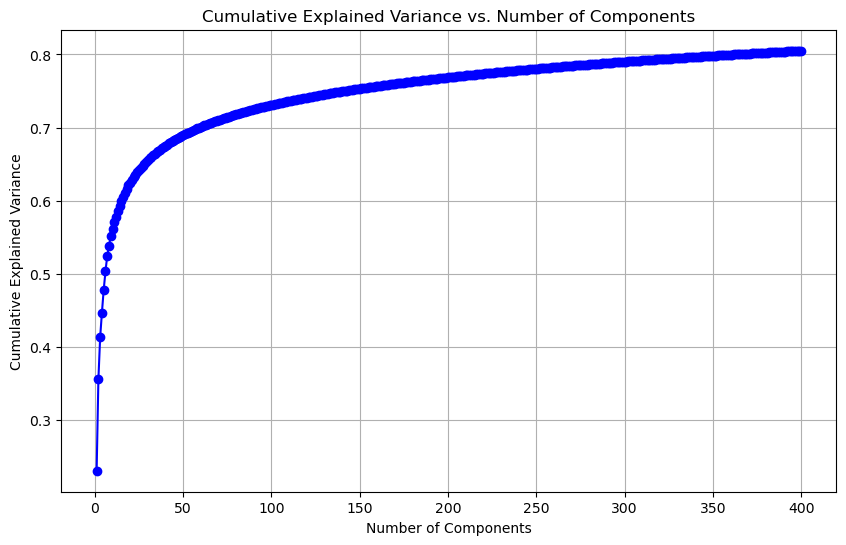

1


In [6]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)


# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [7]:
# Train an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train_pca, y_train)


# Evaluate the classifier
y_pred = svm_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.5316666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.35      0.35       437
           1       0.73      0.72      0.72       474
           2       0.54      0.60      0.57       553
           3       0.53      0.59      0.56       525
           4       0.42      0.31      0.35       510
           5       0.57      0.61      0.59       501

    accuracy                           0.53      3000
   macro avg       0.52      0.53      0.52      3000
weighted avg       0.53      0.53      0.53      3000



In [8]:
# Evaluate the classifier on the training data
train_accuracy = svm_classifier.score(X_train_pca, y_train)

# Evaluate the classifier on the test data
y_pred = svm_classifier.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print("Classification Report:\n", classification_rep)

Training Accuracy: 0.639090779535414
Test Accuracy: 0.5316666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.35      0.35       437
           1       0.73      0.72      0.72       474
           2       0.54      0.60      0.57       553
           3       0.53      0.59      0.56       525
           4       0.42      0.31      0.35       510
           5       0.57      0.61      0.59       501

    accuracy                           0.53      3000
   macro avg       0.52      0.53      0.52      3000
weighted avg       0.53      0.53      0.53      3000

